In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from operator import itemgetter
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import (GradientBoostingRegressor, GradientBoostingClassifier)
pd.set_option('display.max_columns', 500)
#import xgboost

%matplotlib inline
sns.set()
plt.rc('xtick', labelsize=10)     
plt.rc('ytick', labelsize=10)

In [2]:
df = pd.read_csv("C:\\Users\\fcres\\OneDrive\\Documents\\DataGlacier\\proyecto_final\\data\\bank-additional-full.csv", sep=';')

In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Categorical columns

In [4]:
categorical_cols=['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']

for col in categorical_cols:# categories
  print(col,":")
  print(df[col].unique())

job :
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital :
['married' 'single' 'divorced' 'unknown']
education :
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default :
['no' 'unknown' 'yes']
housing :
['no' 'yes' 'unknown']
loan :
['no' 'yes' 'unknown']
contact :
['telephone' 'cellular']
month :
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week :
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome :
['nonexistent' 'failure' 'success']


## Numerical columns

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
numeric_col=df._get_numeric_data().columns
num_bank_df=df._get_numeric_data()

## Target

In [7]:
print('"y" distribution in % : \n', (df.groupby("y")["y"].count())/df.y.count()*100)

print('"y" distribution in instances: \n', df.groupby("y")["y"].count())

"y" distribution in % : 
 y
no     88.734583
yes    11.265417
Name: y, dtype: float64
"y" distribution in instances: 
 y
no     36548
yes     4640
Name: y, dtype: int64


In [8]:
y_perc=(df.groupby("y")["y"].count())/df.y.count()*100

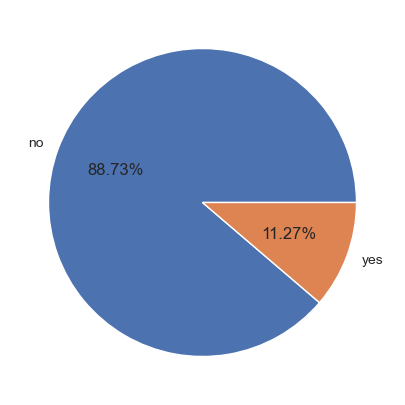

In [9]:
labels=list(y_perc.index)
fig = plt.figure(figsize=(10,5)); ax = plt.axes()

ax.pie(y_perc ,labels=labels,autopct='%1.2f%%')
plt.show()

## Outliers detection

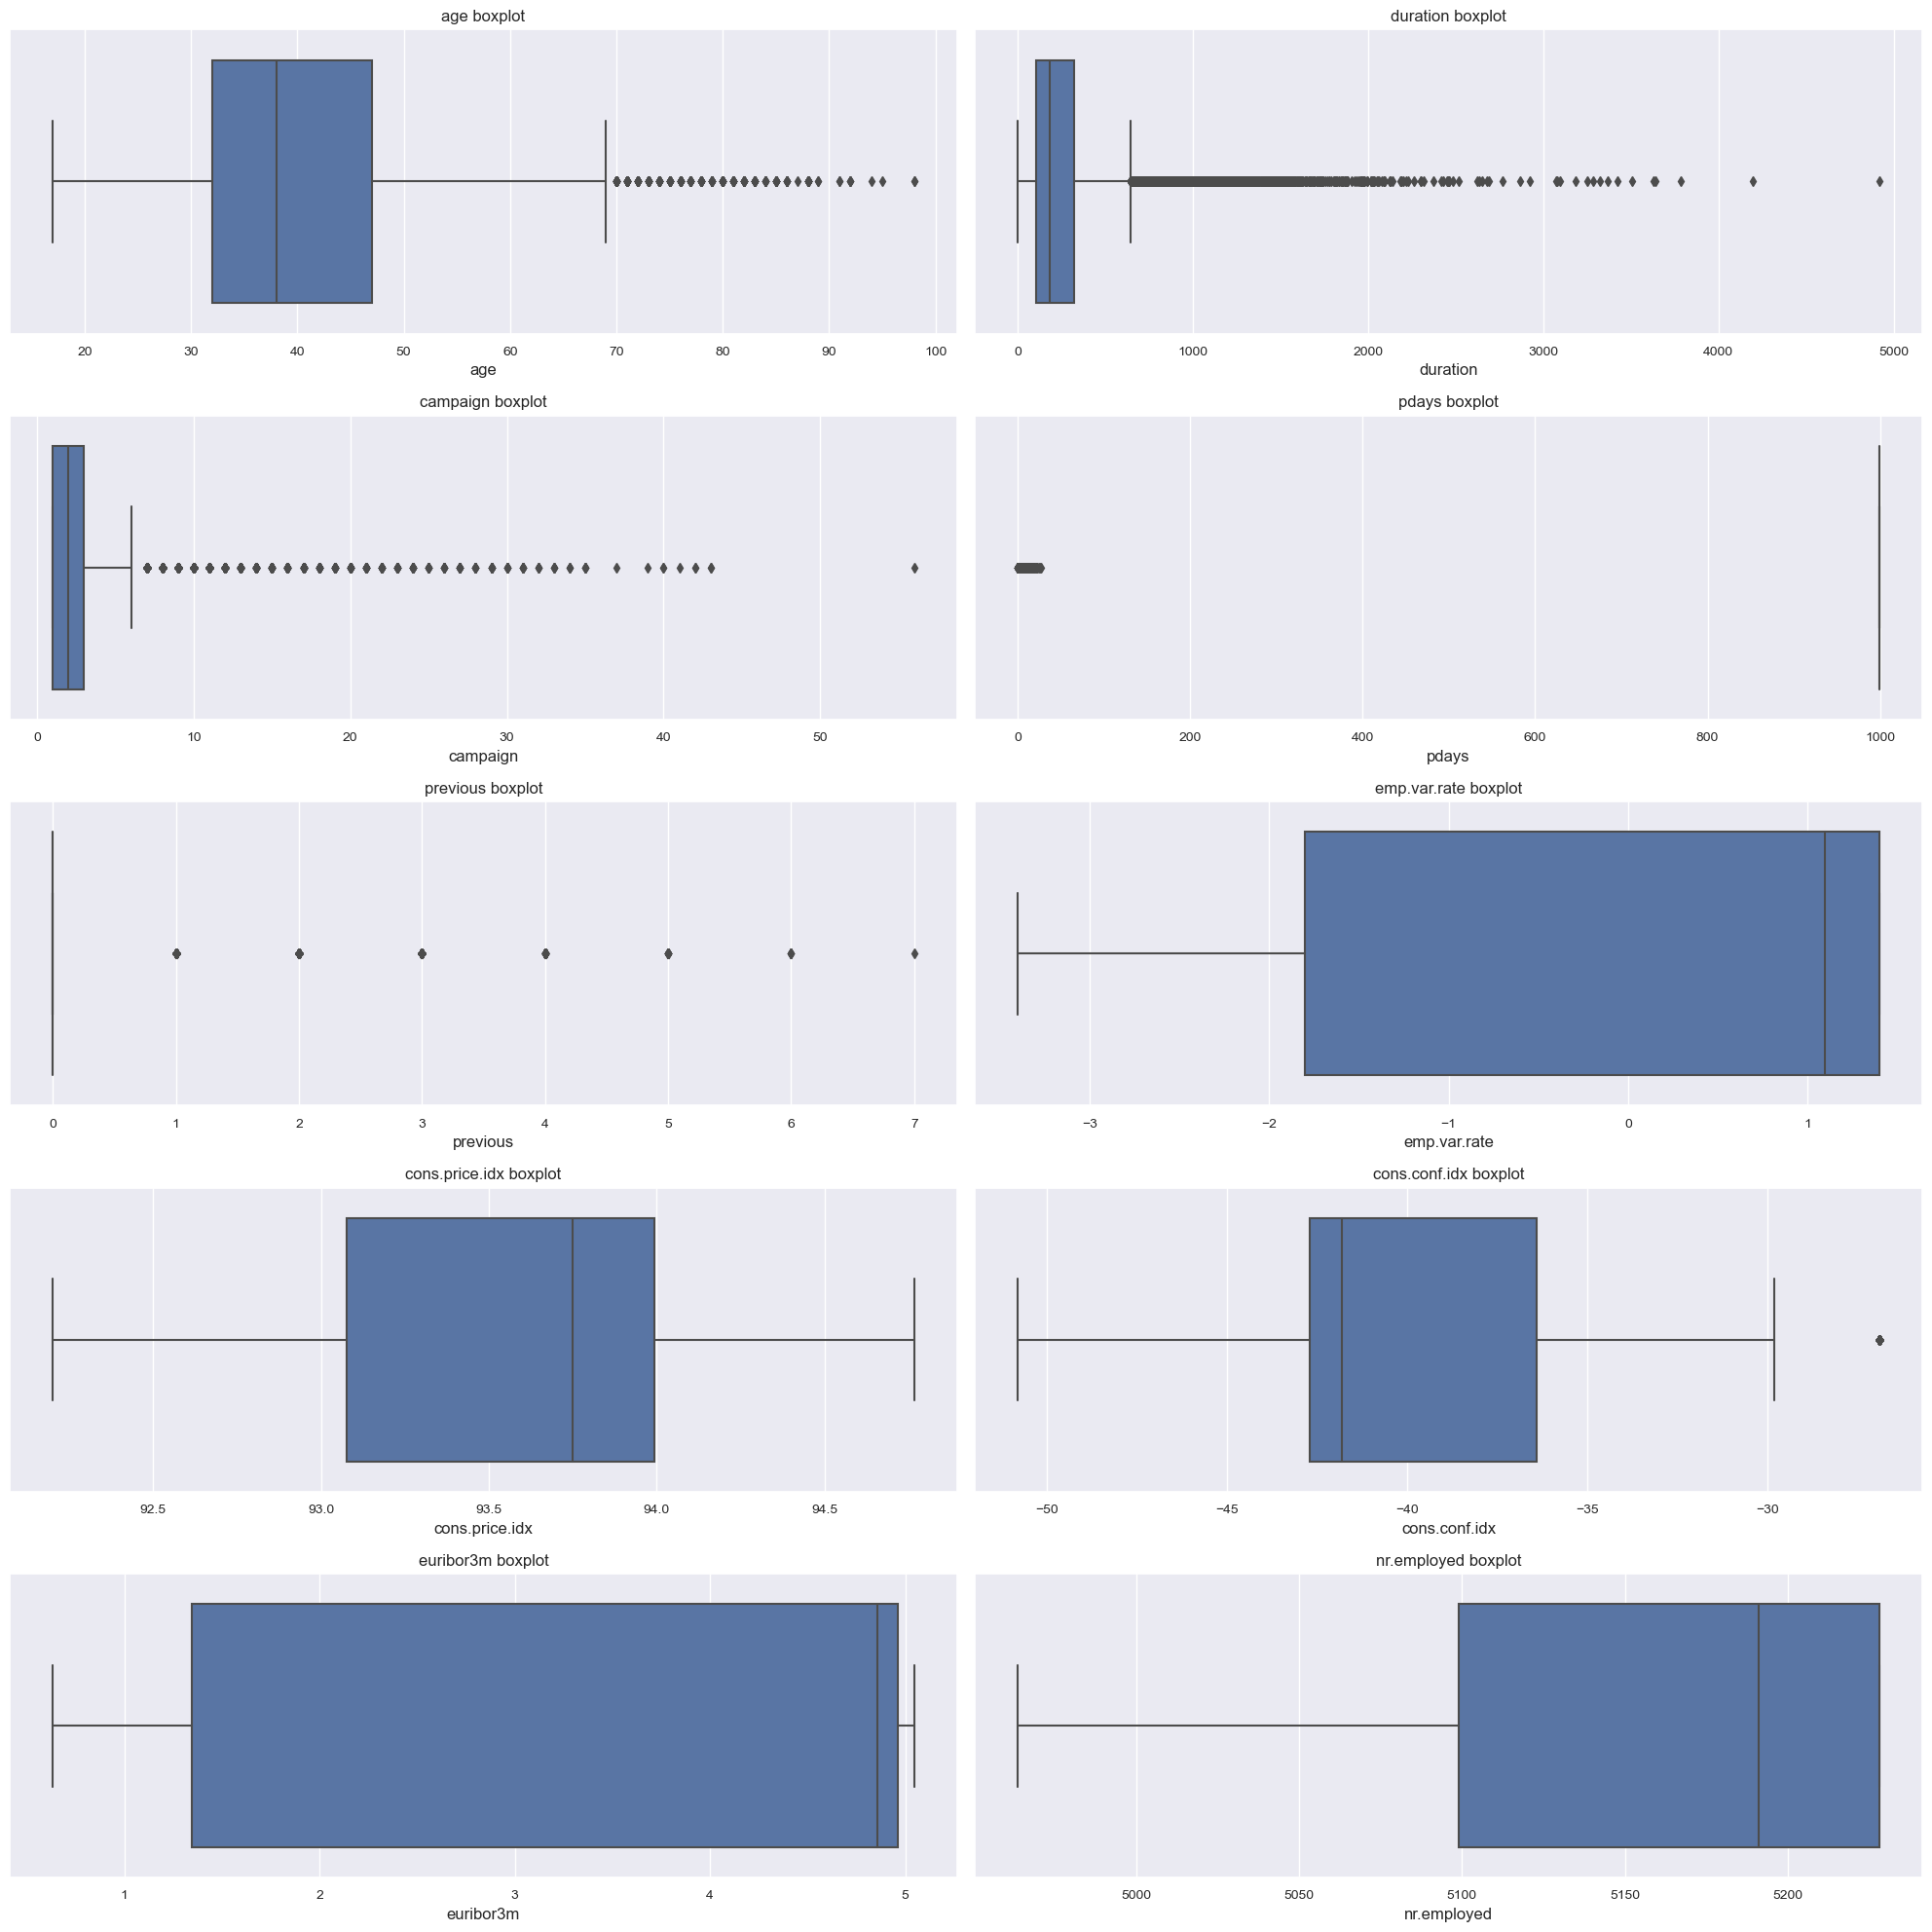

In [10]:
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x=col, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f"{col} boxplot")
    axes[i//2, i%2].set_xlabel(col)

plt.tight_layout()
plt.show()

Based on the boxplots' interquartile ranges (IQR), we can identify that the variables "age", "duration", and "campaign" have outliers that need treatment. However, due to the assignment's statement, we will exclude "duration" from further analysis as it highly affects the output target.

The boxplots for "pdays" and "previous" appear unusual, so we need to investigate them further.

In [11]:
df.drop("duration",inplace=True,axis=1)

### Pdays

The "pdays" variable represents the number of days that have passed since the client was last contacted from a previous campaign. If the value is 999, it means the client was not previously contacted. It is a numeric variable.





In [12]:
ranges=[-1,5,10,15,20,25,30,1000]
labels=["0-5","6-10","11-15","16-20","21-25","26-30","No previous contacted"]

df["pdays_range"]=pd.cut(df.pdays,bins= ranges,labels=labels)

pdays_range_df=df.groupby("pdays_range")["campaign"].count()

pdays_range_df_per=pdays_range_df/(df.campaign.count())*100

print(pdays_range_df_per)
print(pdays_range_df)

pdays_range
0-5                       1.711664
6-10                      1.471302
11-15                     0.403030
16-20                     0.072837
21-25                     0.014567
26-30                     0.004856
No previous contacted    96.321744
Name: campaign, dtype: float64
pdays_range
0-5                        705
6-10                       606
11-15                      166
16-20                       30
21-25                        6
26-30                        2
No previous contacted    39673
Name: campaign, dtype: int64


Since 96% of the clients were not previously contacted, we are not considering outliers in this feature. Therefore, we are treating the value of 999 as a legitimate value, rather than an outlier.





### Previous

The "previous" variable represents the number of contacts performed before this campaign for the client. It is a numeric variable.





In [13]:
(df.groupby("previous")["campaign"].count())/df.campaign.count()*100

previous
0    86.343110
1    11.073614
2     1.830630
3     0.524425
4     0.169952
5     0.043702
6     0.012139
7     0.002428
Name: campaign, dtype: float64

Since 97% of the clients have either 0 or 1 value for the "previous" variable, we are not considering outliers in this feature. This is because we want the model to learn how to treat customers who have been contacted before. Even though they are relatively few, they represent a real possibility that we want the model to be able to handle.





### 1) IQR

In [14]:
def remove_outliers(dfx):
    q1 = dfx.quantile(0.25)
    q3 = dfx.quantile(0.75)
    iqr = q3 - q1
    cut_off = iqr*1.5
    
    df_filtred = dfx[~((dfx < (dfx.quantile(0.25) - cut_off)) | (dfx > (dfx.quantile(0.75) + cut_off))).any(axis=1)]
    
    
    return df_filtred

In [15]:
df_iqr = df.copy()

df_iqr = remove_outliers(df_iqr[['age','campaign']])

In [16]:
print(df.shape[0]-df_iqr.shape[0], 'rows have been eliminated')

2861 rows have been eliminated


In [17]:
df_iqr.reset_index(drop=True, inplace=True)

Text(0.5, 0, 'Campaign')

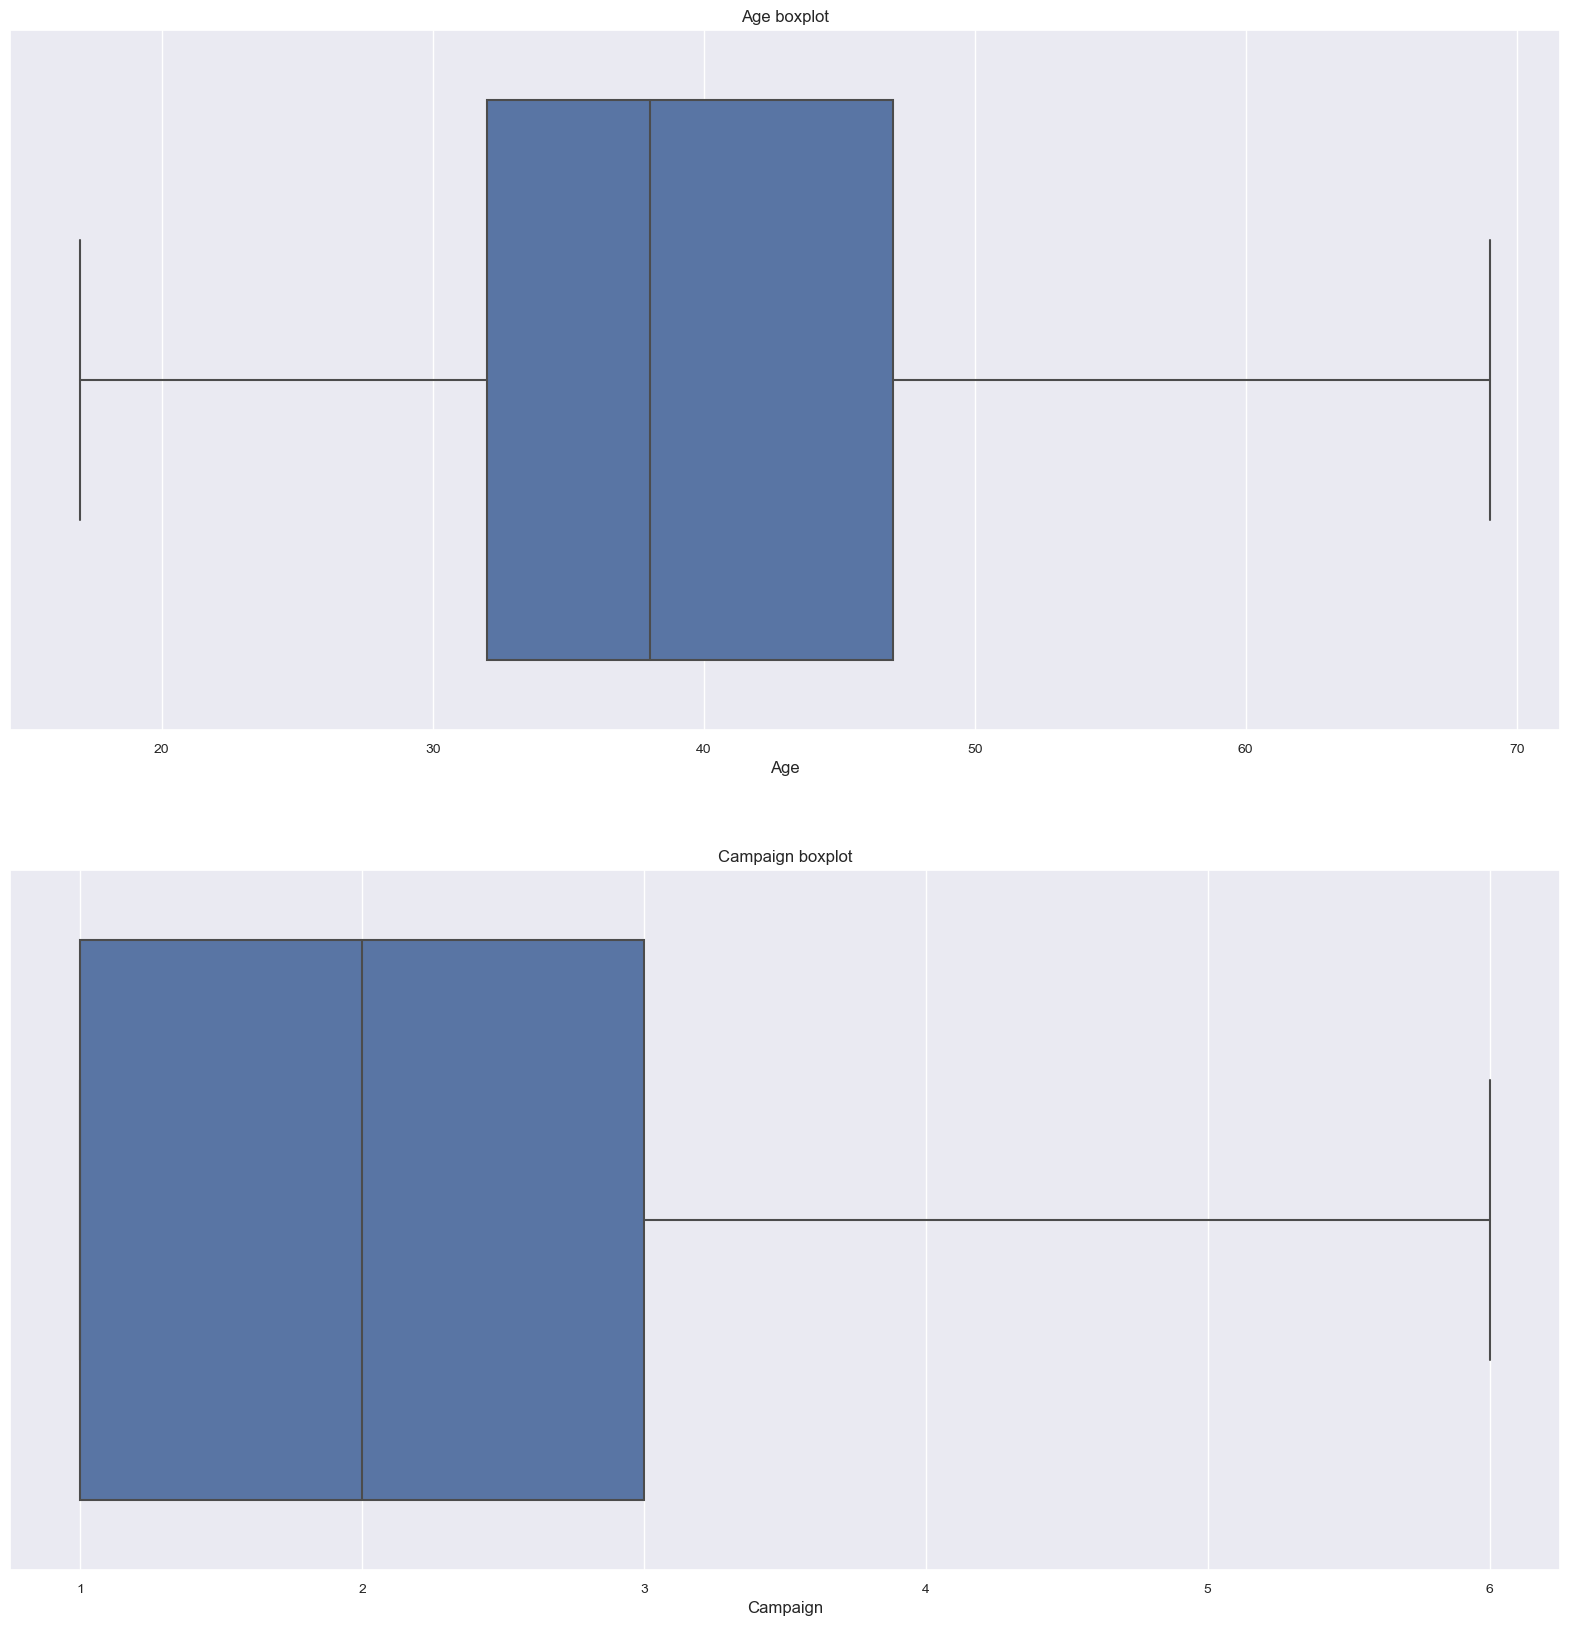

In [18]:
plt.figure(figsize=(20, 20))
plt.subplot(2, 1, 1)
sns.boxplot(data=df_iqr, x='age')
plt.title('Age boxplot')
plt.xlabel('Age')

plt.subplot(2, 1, 2)
sns.boxplot(data=df_iqr, x='campaign')
plt.title('Campaign boxplot')
plt.xlabel('Campaign')

### 2) WOE

In [19]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [20]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [21]:
aux = df['y'] == 'no'
aux1 = df['y'] == 'yes'

# Convert
df.loc[aux, 'y'] = 0
df.loc[aux1, 'y'] = 1

print(df['y'].value_counts())

0    36548
1     4640
Name: y, dtype: int64


In [22]:
df['y'] = df['y'].astype(int)

print(df.dtypes)

age                  int64
job                 object
marital             object
education           object
default             object
housing             object
loan                object
contact             object
month               object
day_of_week         object
campaign             int64
pdays                int64
previous             int64
poutcome            object
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                    int32
pdays_range       category
dtype: object


In [23]:
iv, woe = iv_woe(data = df, target = 'y', bins=10, show_woe = True)

Information value of age is 0.139397
  Variable          Cutoff     N  Events  % of Events  Non-Events  \
0      age  (16.999, 28.0]  4216     736     0.158621        3480   
1      age    (28.0, 31.0]  5114     608     0.131034        4506   
2      age    (31.0, 33.0]  3679     394     0.084914        3285   
3      age    (33.0, 35.0]  3504     351     0.075647        3153   
4      age    (35.0, 38.0]  4662     434     0.093534        4228   
5      age    (38.0, 41.0]  3871     311     0.067026        3560   
6      age    (41.0, 45.0]  4311     348     0.075000        3963   
7      age    (45.0, 49.0]  3776     289     0.062284        3487   
8      age    (49.0, 55.0]  4473     428     0.092241        4045   
9      age    (55.0, 98.0]  3582     741     0.159698        2841   

   % of Non-Events       WoE        IV  
0         0.095217  0.510355  0.032358  
1         0.123290  0.060922  0.000472  
2         0.089882 -0.056859  0.000282  
3         0.086270 -0.131411  0.001396 

In [24]:
print(iv)

         Variable        IV
0             age  0.139397
0             job  0.188713
0         marital  0.028215
0       education  0.048576
0         default  0.127776
0         housing  0.001383
0            loan  0.000269
0         contact  0.251663
0           month  0.485117
0     day_of_week  0.006493
0        campaign  0.054246
0           pdays  0.000000
0        previous  0.350500
0        poutcome  0.547671
0    emp.var.rate  1.069750
0  cons.price.idx  0.440236
0   cons.conf.idx  0.860740
0       euribor3m  1.046047
0     nr.employed  1.173723
0     pdays_range  0.554801


### Information Value

| Predictive Power | IV |
| --- | --- |
| Useless for prediction | <0.02 |
| Weak predictor | 0.02 to 0.1 |
| Medium predictor | 0.1 to 0.3 |
| Strong predictor | 0.3 to 0.5 |
| Suspicious or too good predictor | > 0.5 |

Based on the IV values calculated for each feature, we can classify them into different categories of predictive power:

| Variable        | IV        | Predictive Power |
|-----------------|-----------|-----------------|
| loan            | 0.000269  | Useless         |
| pdays           | 0.000000  | Useless         |
| housing         | 0.001383  | Useless         |
| day_of_week     | 0.006493  | Useless         |
| marital         | 0.028215  | Weak            |
| education       | 0.048576  | Weak            |
| campaign        | 0.054246  | Weak            |
| default         | 0.127776  | Weak            |
| age             | 0.139397  | Medium          |
| poutcome        | 0.547671  | Strong          |
| pdays_range     | 0.554801  | Strong          |
| previous        | 0.350500  | Medium          |
| cons.price.idx  | 0.440236  | Strong          |
| job             | 0.188713  | Medium          |
| contact         | 0.251663  | Medium          |
| cons.conf.idx   | 0.860740  | Suspicious      |
| emp.var.rate    | 1.069750  | Suspicious      |
| euribor3m       | 1.046047  | Suspicious      |
| nr.employed     | 1.173723  | Suspicious      |
| month           | 0.485117  | Strong          |




### Replacement with WOE values
As we said before, we will treat "age" and "campaign".

In [25]:
df_woe= df.copy()

In [26]:
age= pd.DataFrame(df_woe['age'])
age.columns = ['age']
age, age.columns

(       age
 0       56
 1       57
 2       37
 3       40
 4       56
 ...    ...
 41183   73
 41184   46
 41185   56
 41186   44
 41187   74
 
 [41188 rows x 1 columns],
 Index(['age'], dtype='object'))

In [27]:
age_table = woe[:10]
age_table

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,age,"(16.999, 28.0]",4216,736,0.158621,3480,0.095217,0.510355,0.032358
1,age,"(28.0, 31.0]",5114,608,0.131034,4506,0.123290,0.060922,0.000472
2,age,"(31.0, 33.0]",3679,394,0.084914,3285,0.089882,-0.056859,0.000282
3,age,"(33.0, 35.0]",3504,351,0.075647,3153,0.086270,-0.131411,0.001396
4,age,"(35.0, 38.0]",4662,434,0.093534,4228,0.115683,-0.212528,0.004707
5,age,"(38.0, 41.0]",3871,311,0.067026,3560,0.097406,-0.373811,0.011356
6,age,"(41.0, 45.0]",4311,348,0.075000,3963,0.108433,-0.368642,0.012325
7,age,"(45.0, 49.0]",3776,289,0.062284,3487,0.095409,-0.426458,0.014126
8,age,"(49.0, 55.0]",4473,428,0.092241,4045,0.110676,-0.182202,0.003359
9,age,"(55.0, 98.0]",3582,741,0.159698,2841,0.077733,0.720001,0.059015


In [28]:
#CREATE STRUCTURE TO EXTRACT LIMITS
idx = pd.IntervalIndex(age_table['Cutoff'])

#INTERVALS , LIMITS AND WOE VALUES
inter = pd.DataFrame({'intervals': idx, 'left': idx.left, 'right': idx.right})
inter['WOE'] = age_table['WoE']
inter

,intervals,left,right,WOE
0,"(16.999, 28.0]",16.999,28.0,0.510355
1,"(28.0, 31.0]",28.000,31.0,0.060922
2,"(31.0, 33.0]",31.000,33.0,-0.056859
3,"(33.0, 35.0]",33.000,35.0,-0.131411
4,"(35.0, 38.0]",35.000,38.0,-0.212528
5,"(38.0, 41.0]",38.000,41.0,-0.373811
6,"(41.0, 45.0]",41.000,45.0,-0.368642
7,"(45.0, 49.0]",45.000,49.0,-0.426458
8,"(49.0, 55.0]",49.000,55.0,-0.182202
9,"(55.0, 98.0]",55.000,98.0,0.720001


In [29]:
#CREATE AUXILIARY VARIABLES
inter['left'][0],inter['right'][0]

aux1 = (inter['left'][0] <=  age) & (age < inter['right'][0])
aux2 = (inter['left'][1] <=  age) & (age < inter['right'][1])
aux3 = (inter['left'][2] <=  age) & (age < inter['right'][2])
aux4 = (inter['left'][3] <=  age) & (age < inter['right'][3])
aux5 = (inter['left'][4] <=  age) & (age < inter['right'][4])
aux6 = (inter['left'][5] <=  age) & (age < inter['right'][5])
aux7 = (inter['left'][6] <=  age) & (age < inter['right'][6])
aux8 = (inter['left'][7] <=  age) & (age < inter['right'][7])
aux9 = (inter['left'][8] <=  age) & (age < inter['right'][8])
aux10 = (inter['left'][9] <=  age) & (age <= inter['right'][9])

In [30]:
#REPLACE VALUES WITH WOE
age[aux1] = inter['WOE'][0]
age[aux2] = inter['WOE'][1]
age[aux3] = inter['WOE'][2]
age[aux4] = inter['WOE'][3]
age[aux5] = inter['WOE'][4]
age[aux6] = inter['WOE'][5]
age[aux7] = inter['WOE'][6]
age[aux8] = inter['WOE'][7]
age[aux9] = inter['WOE'][8]
age[aux10] = inter['WOE'][9]

age.value_counts()

age      
-0.212528    5014
-0.182202    4664
-0.368642    4486
 0.720001    4230
 0.060922    4168
-0.426458    4040
-0.373811    4000
-0.056859    3793
-0.131411    3578
 0.510355    3215
dtype: int64

In [31]:
df_woe['age'] = age
df_woe['age'].value_counts()

-0.212528    5014
-0.182202    4664
-0.368642    4486
 0.720001    4230
 0.060922    4168
-0.426458    4040
-0.373811    4000
-0.056859    3793
-0.131411    3578
 0.510355    3215
Name: age, dtype: int64

In [32]:
campaign= pd.DataFrame(df_woe['campaign'])
campaign.columns = ['campaign']
campaign['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

In [33]:
#SELECT VALUES FOR CAMPAIGN VARIABLE
aux_c = woe['Variable'] == 'campaign' 
campaign_table = woe[aux_c]
campaign_table

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,campaign,"(0.999, 2.0]",28212,3511,0.756681,24701,0.675851,0.112969,0.009131
1,campaign,"(2.0, 3.0]",5341,574,0.123707,4767,0.130431,-0.052931,0.000356
2,campaign,"(3.0, 5.0]",4250,369,0.079526,3881,0.106189,-0.289139,0.007709
3,campaign,"(5.0, 56.0]",3385,186,0.040086,3199,0.087529,-0.780935,0.037050


In [34]:
#CREATE STRUCTURE TO EXTRACT LIMITS
idx = pd.IntervalIndex(campaign_table['Cutoff'])

#INTERVALS , LIMITS AND WOE VALUES
inter = pd.DataFrame({'intervals': idx, 'left': idx.left, 'right': idx.right})
inter['WOE'] = campaign_table['WoE']
inter

,intervals,left,right,WOE
0,"(0.999, 2.0]",0.999,2.0,0.112969
1,"(2.0, 3.0]",2.000,3.0,-0.052931
2,"(3.0, 5.0]",3.000,5.0,-0.289139
3,"(5.0, 56.0]",5.000,56.0,-0.780935


In [35]:
#CREATE AUXILIARY VARIABLES
inter['left'][0],inter['right'][0]

aux1 = (inter['left'][0] <=  campaign) & (campaign < inter['right'][0])
aux2 = (inter['left'][1] <=  campaign) & (campaign < inter['right'][1])
aux3 = (inter['left'][2] <=  campaign) & (campaign < inter['right'][2])
aux4 = (inter['left'][3] <=  campaign) & (campaign <= inter['right'][3])

In [36]:
#REPLACE VALUES WITH WOE
campaign[aux1] = inter['WOE'][0]
campaign[aux2] = inter['WOE'][1]
campaign[aux3] = inter['WOE'][2]
campaign[aux4] = inter['WOE'][3]

campaign.value_counts()

campaign 
 0.112969    17642
-0.052931    10570
-0.289139     7992
-0.780935     4984
dtype: int64

In [37]:
#REPLACE OLD VARIABLE
df_woe['campaign'] = campaign
df_woe['campaign'].value_counts()

 0.112969    17642
-0.052931    10570
-0.289139     7992
-0.780935     4984
Name: campaign, dtype: int64

In [38]:
df_woe.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_range
0,0.720001,housemaid,married,basic.4y,no,no,no,telephone,may,mon,0.112969,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,No previous contacted
1,0.720001,services,married,high.school,unknown,no,no,telephone,may,mon,0.112969,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,No previous contacted
2,-0.212528,services,married,high.school,no,yes,no,telephone,may,mon,0.112969,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,No previous contacted


In [39]:
df_woe.shape

(41188, 21)

From here, we continue with bank_df_woe as our dataframe for modeling

In [40]:
df = df_woe.copy()

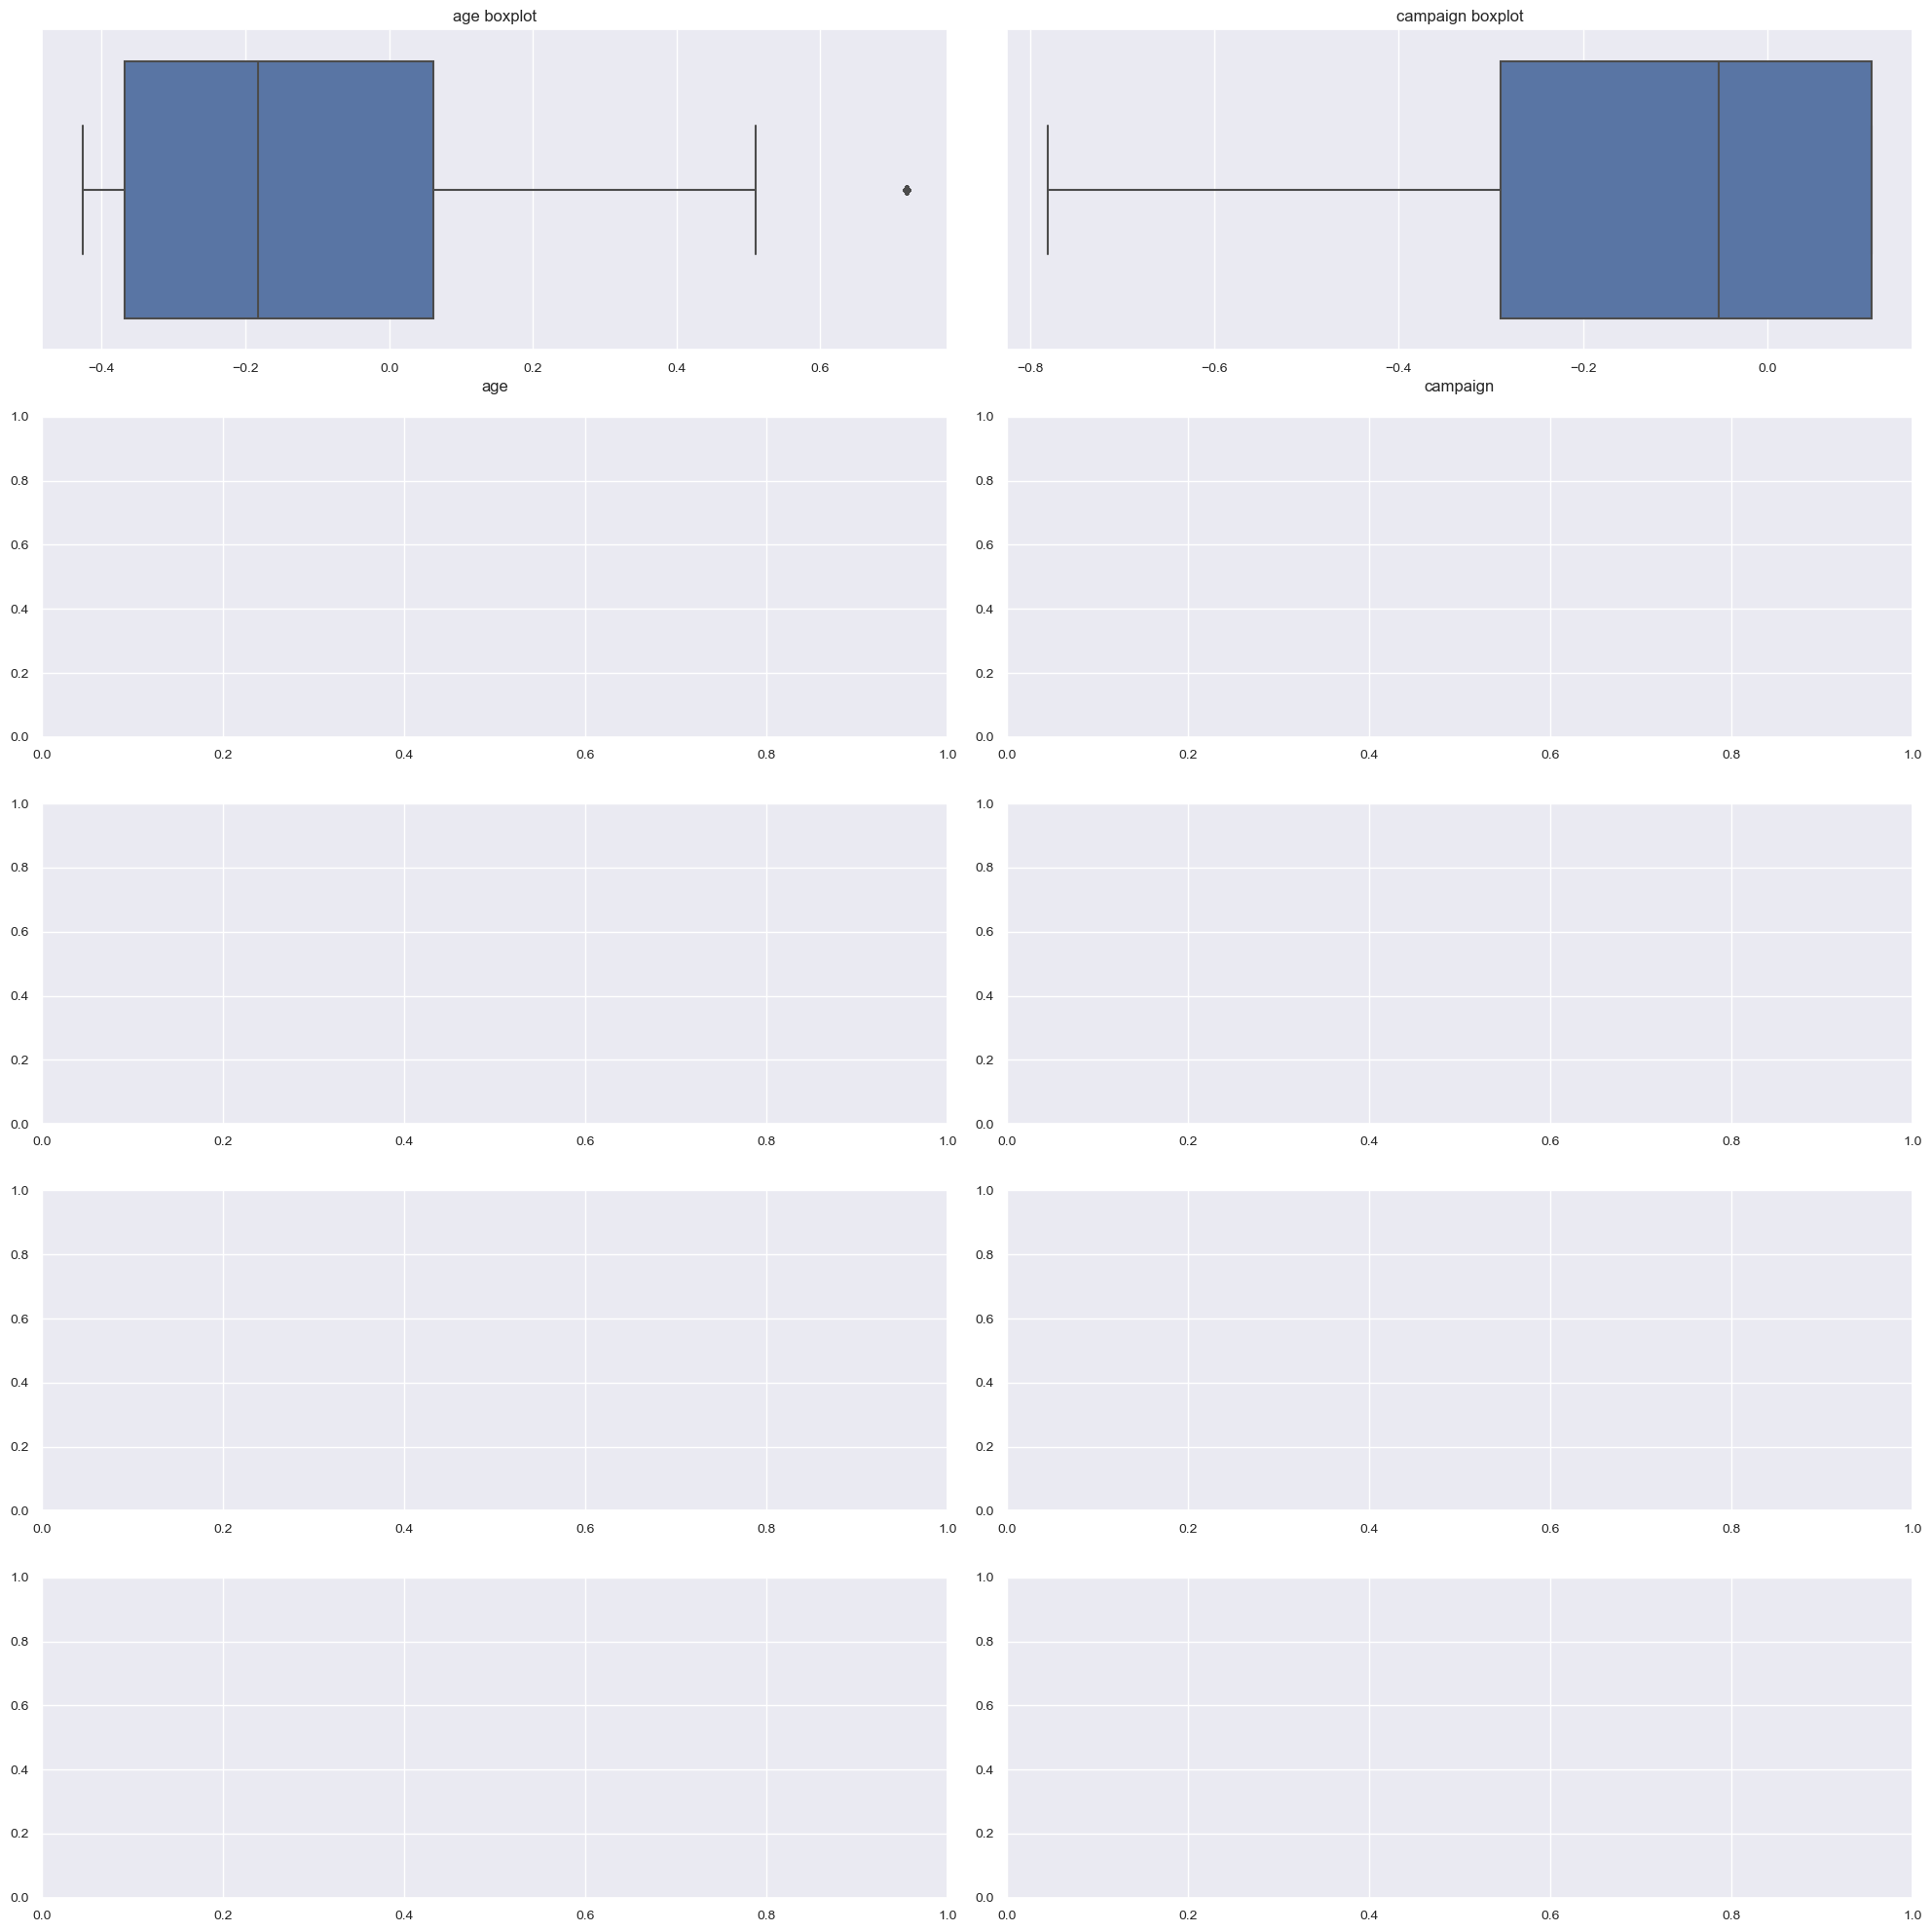

In [41]:
num_cols = ['age', 'campaign']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x=col, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f"{col} boxplot")
    axes[i//2, i%2].set_xlabel(col)

plt.tight_layout()
plt.show()

### Skew

In [42]:
df.skew()

age               1.149065
campaign         -1.319181
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
y                 2.450330
dtype: float64

In [43]:
df_woe['pdays'] = np.sqrt(df_woe['pdays'])
df_woe['previous'] = np.sqrt(df_woe['previous'])

In [44]:
df_woe.skew()

age               1.149065
campaign         -1.319181
pdays            -4.927351
previous          2.388752
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
y                 2.450330
dtype: float64

The square root function has no effect on the variable 'pdays' due to its values being very high, close to the maximum value of the data type used to store the values.

### Missing Values

The dataset contains missing values represented by the string "unknown". Before proceeding with any analysis, we need to handle these missing values appropriately. One way to do this is by replacing the string "unknown" with a NaN value using NumPy's np.NaN function.

After replacing the missing values with NaN, we can consider different approaches to handle them, such as imputing the missing values or deleting them.

In [45]:
df= df.replace(to_replace="unknown" ,value=np.NaN,regex=True)

In [46]:
print(df.isnull().sum())

null_columns=["job","marital","education","default","housing","loan"]

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
pdays_range          0
dtype: int64


In [47]:
nulls=df[null_columns].isnull().sum()
print("Q of nulls: ")
print(nulls)

print("% of nulls: ")
print(nulls/df.shape[0]*100)

Q of nulls: 
job           330
marital        80
education    1731
default      8597
housing       990
loan          990
dtype: int64
% of nulls: 
job           0.801204
marital       0.194231
education     4.202680
default      20.872584
housing       2.403613
loan          2.403613
dtype: float64


Text(0.5, 0, 'Features')

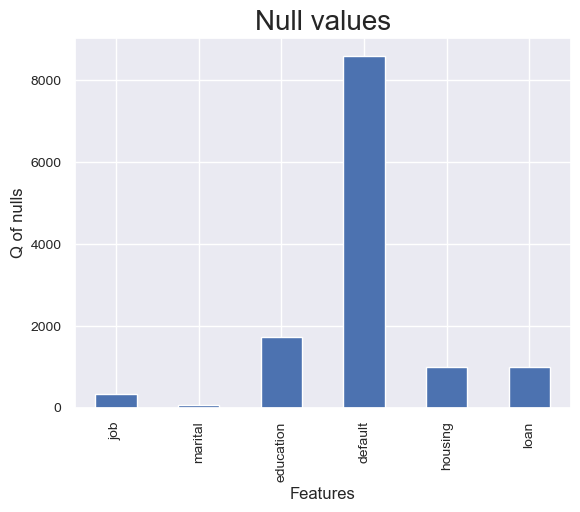

In [48]:
nulls.plot.bar()

plt.title('Null values', fontsize=20)
plt.ylabel('Q of nulls')
plt.xlabel('Features')

In order ot be more sure what is the best option of missing values treatment for the model, we are going to analyse a little bit deeper the features with null values.

First "default", the feature with most nulls. It has 20.9% of missing values.

In [49]:
print("Value Distribution: ")
print(df.default.value_counts())

print("Value Distribution %: ")
print(df.default.value_counts()/df.default.notnull().sum()*100)

Value Distribution: 
no     32588
yes        3
Name: default, dtype: int64
Value Distribution %: 
no     99.990795
yes     0.009205
Name: default, dtype: float64


On one hand, the "default" feature has a significant number of missing values (20.9%), making imputation a risky option that could introduce bias into the model. To create a realistic and useful model, it would be best to avoid imputation for this feature.

On the other hand, this feature is highly unbalanced, with only 0.009% of clients having a non-null value of "1" for default. Additionally, the feature's Information Value (IV) is 0.128, indicating that it is a medium predictor.

Taken together, these factors suggest that the best option may be to simply delete the "default" feature. However, we will still explore the impact of both deleting the feature and imputing missing values using KNNImputer (for "loan", "housing", and "default") on the model.

## 1) KNN Imputation

In [50]:
knn_df=df.copy()

In [51]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
pdays_range          0
dtype: int64

In [52]:
aux = knn_df['default'] == 'no'
aux1 = knn_df['default'] == 'yes'

# Convert
knn_df.loc[aux, 'default'] = 0
knn_df.loc[aux1, 'default'] = 1

aux = knn_df['housing'] == 'no'
aux1 = knn_df['housing'] == 'yes'

# Convert
knn_df.loc[aux, 'housing'] = 0
knn_df.loc[aux1, 'housing'] = 1

aux = knn_df['loan'] == 'no'
aux1 = knn_df['loan'] == 'yes'

# Convert
knn_df.loc[aux, 'loan'] = 0
knn_df.loc[aux1, 'loan'] = 1


In [53]:
%%time
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2,weights='uniform',metric='nan_euclidean')
x= knn_df[["default","housing","loan"]]
x=imputer.fit_transform(x)
knn_df.loc[:,["default","housing","loan"]]= x

Wall time: 14.8 s


In [54]:
#Binarization of the imputation done by KNN

knn_df["loan"] = knn_df.loan.astype(bool).astype(float)
knn_df["housing"] = knn_df.housing.astype(bool).astype(float)
knn_df["default"] = knn_df.default.astype(bool).astype(float)

In [55]:
knn_df.isnull().mean()*100

age               0.000000
job               0.801204
marital           0.194231
education         4.202680
default           0.000000
housing           0.000000
loan              0.000000
contact           0.000000
month             0.000000
day_of_week       0.000000
campaign          0.000000
pdays             0.000000
previous          0.000000
poutcome          0.000000
emp.var.rate      0.000000
cons.price.idx    0.000000
cons.conf.idx     0.000000
euribor3m         0.000000
nr.employed       0.000000
y                 0.000000
pdays_range       0.000000
dtype: float64

In [56]:
knn_df.dropna(subset=["job", "marital", "education"],axis=0,inplace=True)

In [57]:
knn_df.shape

(39191, 21)

###  2) Drop all null values (prefered option)

In [58]:
df_dropna=df.copy()

In [59]:
df_dropna= df_dropna.replace(to_replace="unknown" ,value=np.NaN,regex=True)

In [60]:
df_dropna.dropna(axis=0,inplace=True)

In [61]:
df_dropna.isnull().mean()

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
pdays_range       0.0
dtype: float64

In [62]:
sorted_df = df.sort_values("default")

In [63]:
import missingno as msno

<AxesSubplot:>

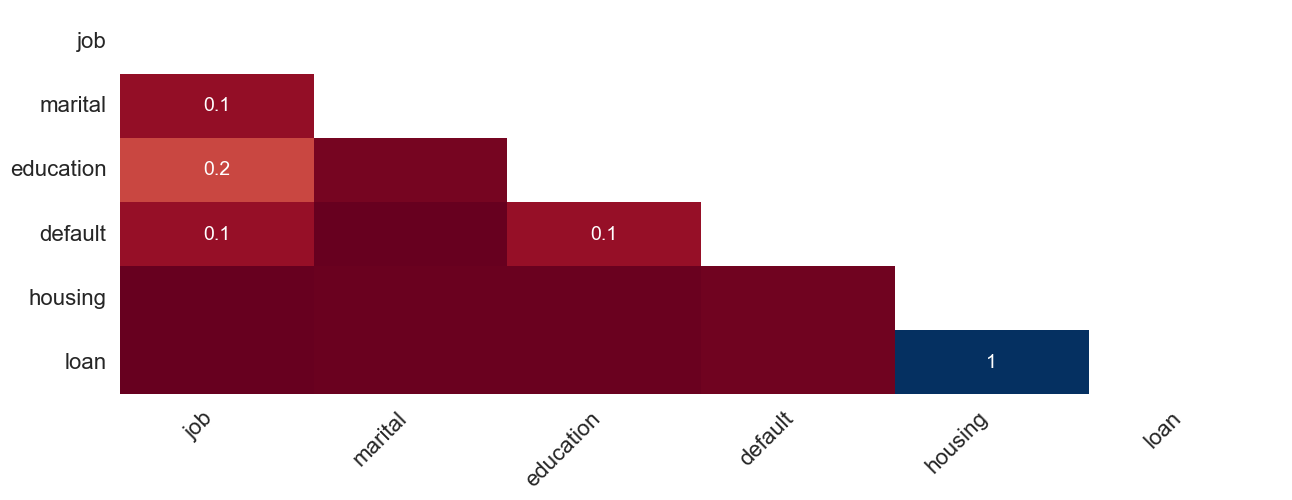

In [64]:
msno.heatmap(sorted_df, figsize=(15,5))

<AxesSubplot:>

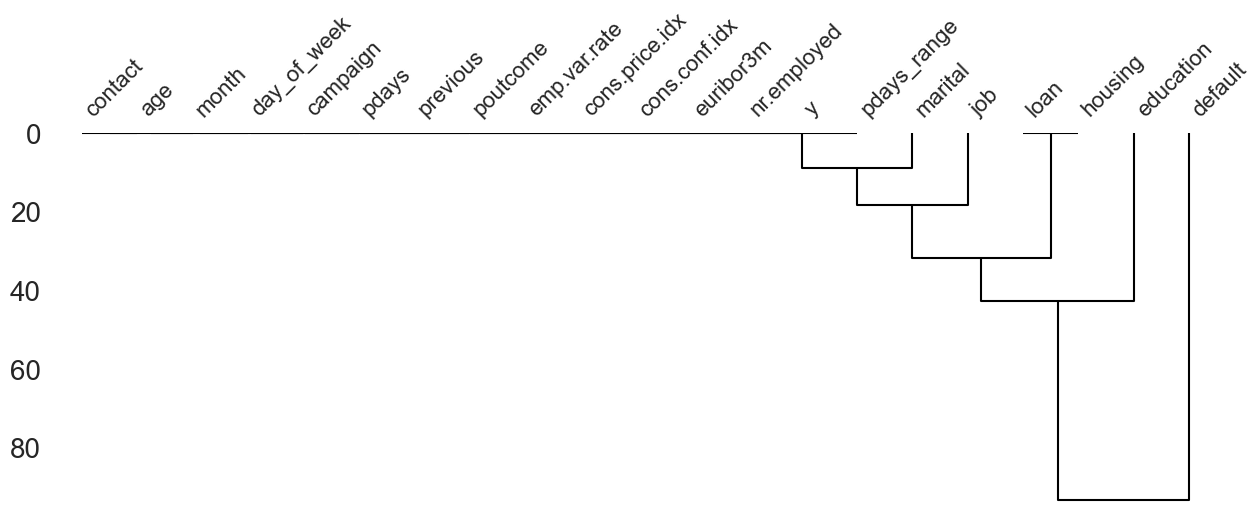

In [65]:
msno.dendrogram(sorted_df, figsize=(15,5))

### Modeling

In [66]:
df.dtypes

age                float64
job                 object
marital             object
education           object
default             object
housing             object
loan                object
contact             object
month               object
day_of_week         object
campaign           float64
pdays                int64
previous             int64
poutcome            object
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                    int32
pdays_range       category
dtype: object

In [72]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.to_list()
numerical_cols.remove("y")
numerical_cols

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [68]:
categorical_cols = df.select_dtypes(include="object").columns.to_list()
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

## KNNImputer

In [69]:
from pycaret.classification import *

In [81]:
clfs = setup(data = knn_df, target = 'y',
             session_id=234, normalize=True, 
             numeric_features=numerical_cols, categorical_features=categorical_cols, 
             transformation = True, 
             remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
             fix_imbalance=True,
             data_split_stratify=True,
             fold_shuffle=True)

,Description,Value
0,session_id,234
1,Target,y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(39191, 21)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [82]:
models = compare_models(sort="AUC", n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8980,0.7922,0.3224,0.5737,0.4127,0.3617,0.3798,0.2890
catboost,CatBoost Classifier,0.8988,0.7855,0.3041,0.5873,0.4004,0.3512,0.3741,5.2930
lr,Logistic Regression,0.8189,0.7822,0.6153,0.3312,0.4305,0.3342,0.3570,0.6050
lda,Linear Discriminant Analysis,0.8188,0.7820,0.6166,0.3312,0.4308,0.3345,0.3575,0.1200
gbc,Gradient Boosting Classifier,0.8835,0.7781,0.4499,0.4751,0.4619,0.3967,0.3970,1.3490
xgboost,Extreme Gradient Boosting,0.8978,0.7779,0.3038,0.5760,0.3972,0.3473,0.3688,1.4940
rf,Random Forest Classifier,0.8866,0.7664,0.3411,0.4862,0.4006,0.3402,0.3468,0.5380
ada,Ada Boost Classifier,0.8674,0.7659,0.5085,0.4202,0.4600,0.3852,0.3876,0.3700
et,Extra Trees Classifier,0.8791,0.7445,0.3355,0.4422,0.3813,0.3157,0.3195,0.6340
nb,Naive Bayes,0.8838,0.7441,0.3532,0.4698,0.4032,0.3403,0.3445,0.0780


### Dropping null values

In [84]:
clfs = setup(data = df_dropna, target = 'y',
             session_id=234, normalize=True, 
             numeric_features=numerical_cols, categorical_features=categorical_cols, 
             transformation = True, 
             remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
             fix_imbalance=True,
             data_split_stratify=True,
             fold_shuffle=True)

,Description,Value
0,session_id,234
1,Target,y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(30488, 21)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [85]:
models = compare_models(sort="AUC", n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8840,0.7926,0.3206,0.5753,0.4113,0.3527,0.3715,0.2930
lr,Logistic Regression,0.8044,0.7923,0.6527,0.3529,0.4580,0.3515,0.3763,0.2790
lda,Linear Discriminant Analysis,0.8001,0.7914,0.6546,0.3469,0.4533,0.3449,0.3710,0.0830
gbc,Gradient Boosting Classifier,0.8722,0.7888,0.4683,0.4957,0.4812,0.4085,0.4089,0.9930
catboost,CatBoost Classifier,0.8828,0.7877,0.3047,0.5690,0.3965,0.3382,0.3587,5.6360
xgboost,Extreme Gradient Boosting,0.8819,0.7754,0.3032,0.5608,0.3932,0.3343,0.3539,1.3330
ada,Ada Boost Classifier,0.8527,0.7728,0.5350,0.4342,0.4789,0.3943,0.3975,0.2710
rf,Random Forest Classifier,0.8692,0.7635,0.3377,0.4778,0.3952,0.3244,0.3308,0.3940
nb,Naive Bayes,0.8535,0.7459,0.4399,0.4356,0.4327,0.3498,0.3524,0.0450
et,Extra Trees Classifier,0.8610,0.7406,0.3443,0.4379,0.3852,0.3082,0.3111,0.6730


### "Unknown" as a category

In [87]:
clfs = setup(data = df, target = 'y',
             session_id=234, normalize=True, 
             numeric_features=numerical_cols, categorical_features=categorical_cols, 
             transformation = True, 
             remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
             fix_imbalance=True,
             data_split_stratify=True,
             fold_shuffle=True)

,Description,Value
0,session_id,234
1,Target,y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(41188, 21)"
5,Missing Values,True
6,Numeric Features,9
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [88]:
models = compare_models(sort="AUC", n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8970,0.8007,0.3267,0.5767,0.4167,0.3649,0.3829,0.2900
catboost,CatBoost Classifier,0.8973,0.7962,0.3045,0.5855,0.4001,0.3501,0.3728,7.1710
lr,Logistic Regression,0.8231,0.7903,0.6352,0.3458,0.4476,0.3532,0.3764,0.3960
lda,Linear Discriminant Analysis,0.8210,0.7895,0.6352,0.3421,0.4446,0.3492,0.3730,0.1390
gbc,Gradient Boosting Classifier,0.8844,0.7889,0.4818,0.4872,0.4844,0.4193,0.4193,1.7400
xgboost,Extreme Gradient Boosting,0.8966,0.7887,0.3033,0.5786,0.3973,0.3468,0.3688,2.1760
rf,Random Forest Classifier,0.8863,0.7751,0.3491,0.4937,0.4089,0.3481,0.3545,0.8170
ada,Ada Boost Classifier,0.8686,0.7710,0.5246,0.4317,0.4736,0.3994,0.4019,0.4880
et,Extra Trees Classifier,0.8789,0.7530,0.3433,0.4518,0.3900,0.3242,0.3280,1.0360
nb,Naive Bayes,0.8520,0.7474,0.4803,0.3848,0.4234,0.3406,0.3454,0.0840


### Conclusion

We have used the pycaret library to determine which model would perform best in our business problem. To do this, we employed pycaret.classification on three different datasets, which were preprocessed using three methods: KNN imputation, dropping all missing values, and treating "Unknown" as a separate category.

We found that the third dataset, which did not involve deleting valuable information, produced the best results based on AUC. As a result, we plan to focus on the two best-performing models, namely Light Gradient Boosting Machine and CatBoost Classifier, and optimize their hyperparameters using Grid Search next week.